In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

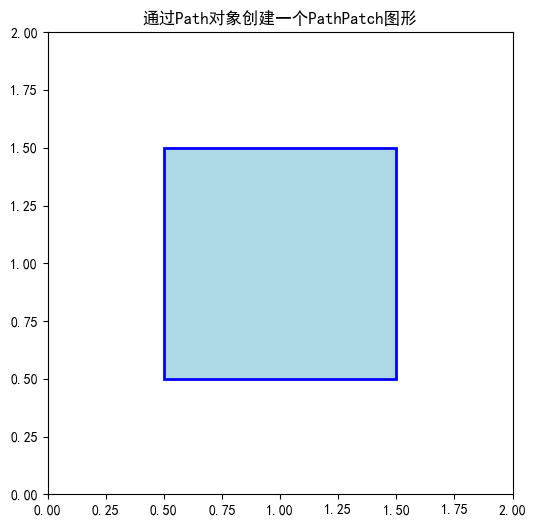

In [3]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# 定义顶点坐标
verts = [
    (0.5, 0.5),  # 左下角
    (0.5, 1.5),  # 左上角
    (1.5, 1.5),  # 右上角
    (1.5, 0.5),  # 右下角
    (0.5, 0.5),  # 闭合路径，此点被忽略
]

# 定义路径代码
codes = [
    Path.MOVETO,  # 移动到起点
    Path.LINETO,  # 画线到第二个点
    Path.LINETO,  # 画线到第三个点
    Path.LINETO,  # 画线到第四个点
    Path.CLOSEPOLY,  # 闭合路径
]

# 创建Path对象
path = Path(verts, codes)

fig, ax = plt.subplots(figsize=(6, 6))

# 创建PathPatch对象并添加到图形
patch = PathPatch(path, facecolor='lightblue', edgecolor='blue', lw=2)
ax.add_patch(patch)


ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
plt.title('通过Path对象创建一个PathPatch图形')
plt.show()

# 2、使用示例：

### 示例 1：使用参数方程创建心形

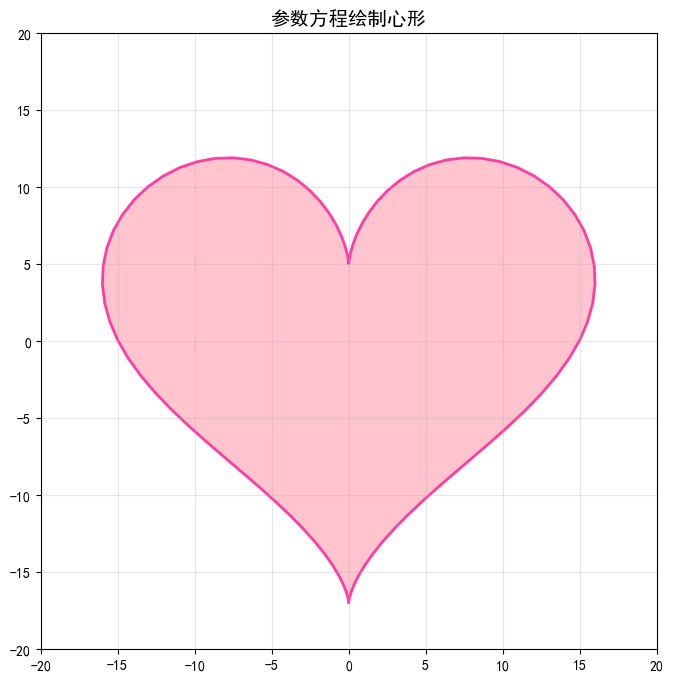

In [4]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch

def create_heart_path(center_x=0, center_y=0, size=1.0):
    """
    创建心形路径的顶点和路径代码
    
    参数:
        center_x: 心形中心的x坐标，默认为0
        center_y: 心形中心的y坐标，默认为0
        size: 心形的大小缩放因子，默认为1.0
        
    返回:
        verts: 组成心形的顶点坐标列表
        codes: 对应的路径绘制指令列表
    """
    # 生成0到2π之间的100个均匀分布的角度值，用于参数方程
    t = np.linspace(0, 2*np.pi, 100)
    
    # 使用经典的心形曲线参数方程计算x和y坐标
    x = size * 16 * np.sin(t)**3
    y = size * (13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t))
    
    # 将x和y坐标转换为顶点元组列表
    verts = list(zip(x, y))
    # 添加第一个点作为最后一个点，确保路径闭合
    verts.append(verts[0])
    
    # 定义路径代码：
    # 第一个点使用MOVETO（移动到起点）
    # 中间所有点使用LINETO（画线连接）
    # 最后一个点使用CLOSEPOLY（闭合路径）
    codes = [Path.MOVETO] + [Path.LINETO] * (len(verts) - 2) + [Path.CLOSEPOLY]
    
    return verts, codes

# 调用函数创建心形路径的顶点和代码
heart_verts, heart_codes = create_heart_path()
# 创建Path对象，定义心形的轮廓
heart_path = Path(heart_verts, heart_codes)

fig, ax = plt.subplots(figsize=(8, 8))

# 创建PathPatch对象，将路径转换为可显示的图形
heart_patch = PathPatch(
    heart_path, 
    facecolor='lightpink', 
    edgecolor='deeppink', 
    lw=2,                
    alpha=0.8             
)

# 将心形图形添加到坐标轴
ax.add_patch(heart_patch)

ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_aspect('equal')
ax.set_title('参数方程绘制心形', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

### 示例 2：创建贝塞尔曲线

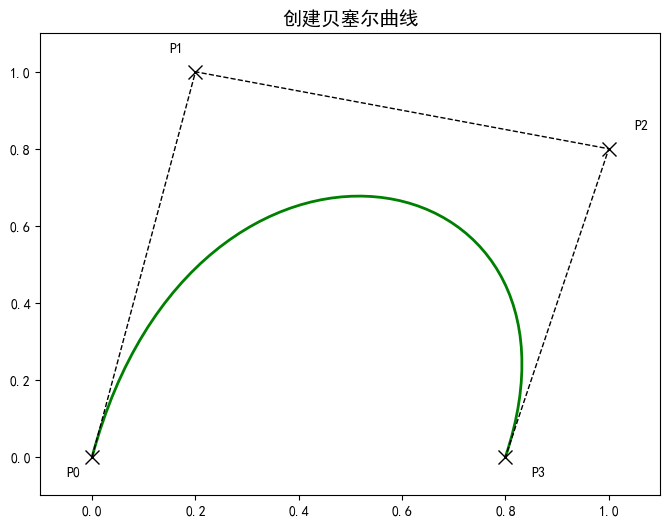

In [5]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# 定义贝塞尔曲线的顶点坐标
verts = [
    (0., 0.),   # P0: 起始点（贝塞尔曲线的起点）
    (0.2, 1.),  # P1: 第一个控制点（影响曲线起始段的方向和曲率）
    (1., 0.8),  # P2: 第二个控制点（影响曲线结束段的方向和曲率）
    (0.8, 0.),  # P3: 终点（贝塞尔曲线的终点）
]

# 定义路径代码，用于指定如何绘制这些点
codes = [
    Path.MOVETO,    # 移动到起始点P0，不绘制线条
    Path.CURVE4,    # 从P0开始，使用P1作为控制点绘制曲线到下一点
    Path.CURVE4,    # 继续使用P2作为控制点绘制曲线
    Path.CURVE4,    # 完成曲线绘制到终点P3
]

# 创建Path对象，将顶点和路径代码组合成完整路径
path = Path(verts, codes)

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(8, 6))

# 创建PathPatch对象，用于显示贝塞尔曲线
patch = PathPatch(path, facecolor='none', edgecolor='green', lw=2)
ax.add_patch(patch)

# 标记所有控制点并绘制辅助线
xs, ys = zip(*verts)
ax.plot(xs, ys, 'x--', lw=1, color='black', ms=10)

# 为每个点添加标签
ax.text(-0.05, -0.05, 'P0') 
ax.text(0.15, 1.05, 'P1') 
ax.text(1.05, 0.85, 'P2') 
ax.text(0.85, -0.05, 'P3')


ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_title('创建贝塞尔曲线', fontsize=14, fontweight='bold')
plt.show()

### 示例 3：创建复合路径

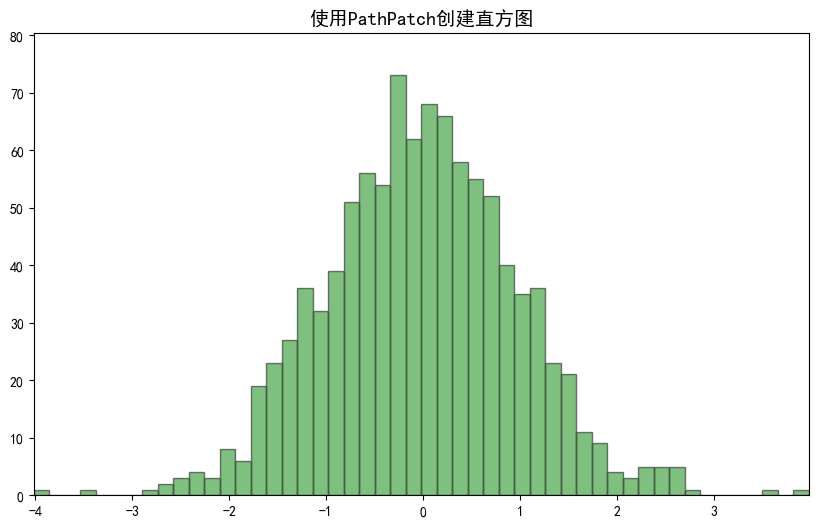

In [6]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# 创建1000个符合标准正态分布的随机数据
data = np.random.randn(1000)
# 计算直方图数据：将数据分成50个区间，得到每个区间的频数n和区间边界bins
n, bins = np.histogram(data, 50)

# 提取直方图每个柱子的边界坐标
left = np.array(bins[:-1])   # 所有柱子的左边界（取bins除最后一个元素外的所有值）
right = np.array(bins[1:])   # 所有柱子的右边界（取bins除第一个元素外的所有值）
bottom = np.zeros(len(left)) # 所有柱子的底部y坐标（都为0）
top = bottom + n             # 所有柱子的顶部y坐标（底部+频数，即柱子高度）

# 计算构建所有矩形所需的顶点总数
nrects = len(n)              # 矩形（柱子）的数量
# 每个矩形需要5个顶点（左下角→左上角→右上角→右下角→闭合点）
nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))  # 存储所有顶点坐标的数组
# 初始化路径代码数组，默认为LINETO（画线）
codes = np.ones(nverts, int) * Path.LINETO

# 设置特殊路径代码：每个矩形的第一个顶点为MOVETO（移动到起点）
# 每个矩形的第五个顶点为CLOSEPOLY（闭合路径）
codes[0::5] = Path.MOVETO    # 索引0,5,10...设置为MOVETO
codes[4::5] = Path.CLOSEPOLY # 索引4,9,14...设置为CLOSEPOLY

# 为每个矩形设置四个顶点坐标（第五个点是闭合点，由CLOSEPOLY自动处理）
verts[0::5, 0] = left        # 第0个顶点：左下角x坐标
verts[0::5, 1] = bottom      # 第0个顶点：左下角y坐标
verts[1::5, 0] = left        # 第1个顶点：左上角x坐标
verts[1::5, 1] = top         # 第1个顶点：左上角y坐标
verts[2::5, 0] = right       # 第2个顶点：右上角x坐标
verts[2::5, 1] = top         # 第2个顶点：右上角y坐标
verts[3::5, 0] = right       # 第3个顶点：右下角x坐标
verts[3::5, 1] = bottom      # 第3个顶点：右下角y坐标

# 创建路径对象，包含所有矩形的顶点和绘制指令
barpath = Path(verts, codes)

fig, ax = plt.subplots(figsize=(10, 6))

# 创建PathPatch对象并添加到坐标轴
patch = PathPatch(
    barpath, 
    facecolor='green',  
    edgecolor='black', 
    alpha=0.5 
)
ax.add_patch(patch)

# 设置坐标轴范围
ax.set_xlim(bins[0], bins[-1])  # x轴范围为数据最小值到最大值
ax.set_ylim(0, np.max(n) * 1.1) # y轴范围从0到最大频数的1.1倍（留有余地）

ax.set_title('使用PathPatch创建直方图', fontsize=14, fontweight='bold')
plt.show()